# 1. Get familiar with the Anaconda environment: you are required to install Anaconda, and create an environment running Python 3.6. Anaconda is available in the Linux OS in the lab computers in N002 and N003.

In [1]:
import platform
print(platform.python_version())

3.6.8


# 2. Get familiar with basic Python for programming ML software.

In [3]:
import time
import json

# Function that returns the position of an item in a list or -1 if not
def isInList(l: list, item: int):
    for x in range(0, len(l)):
        if l[x] == item:
            return x
    return -1

# Function that returns the average from a list of numbers
def average(l: list):
    count = 0
    for x in l:
        count += x
    return count / len(l)

# Function that returns the factorial of a positive integer
def factorial(i: int):
    if i == 0:
        return 1
    else:
        return i * factorial(i-1)

# Function that returns the current time
def getTime():
    print(time.ctime())

# Function that returns the price of bitcoin from a example json
def getBitcoinPrice():
    rawJson = '{ "currency":"Bitcoin", "price":3456.78 }'
    objectJson = json.loads(rawJson)
    return objectJson["price"]

# Function that returns the lowest item in a list
def getLowest(l: list):
    lowest = 0
    for item in l:
        if(item < lowest):
            lowest = item
    return lowest

# Function that returns the highest item in a list
def getHighest(l: list):
    highest = 0
    for item in l:
        if(item > highest):
            highest = item
    return highest


# 3. Get familiar with libraries like numpy and matplotlib.

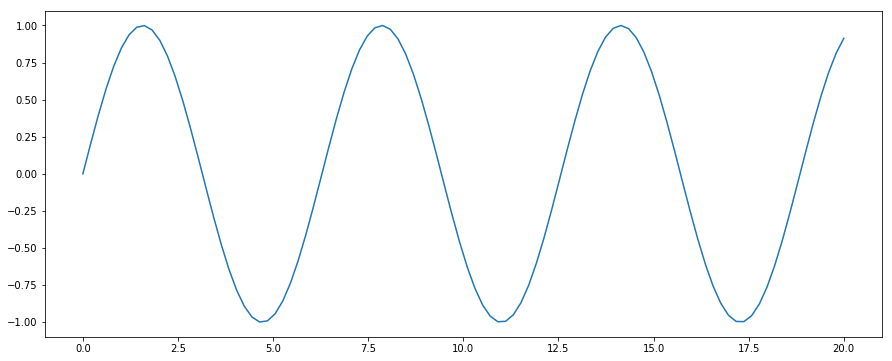

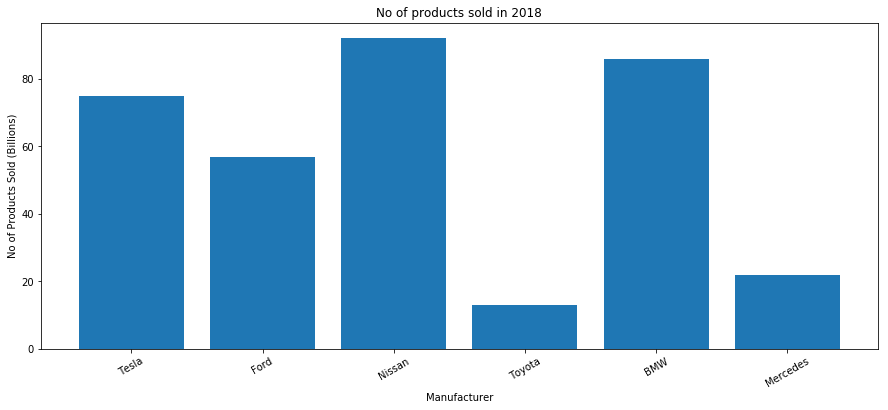

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [55]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# graph code as from source [1]

# Plots a graph
def plotSinGraph():
    x = np.linspace(0, 20, 100)  # Create a list of evenly-spaced numbers over the range
    plt.figure(figsize=(15,6))
    plt.plot(x, np.sin(x))       # Plot the sine of each x point
    plt.show()                   # Display the plot

### end of source [1]

plotSinGraph()
# Prints a 2d array

def plotBarChart():
    
    label = ['Tesla', 'Ford', 'Nissan', 'Toyota', 'BMW', 'Mercedes']
    no_sold = [75, 57, 92, 13, 86, 22]

    index = np.arange(len(label))
    plt.figure(figsize=(15,6))
    plt.bar(index, no_sold)
    plt.ylabel('No of Products Sold (Billions)')
    plt.xlabel('Manufacturer')
    plt.xticks(index, label, rotation=30)
    plt.title('No of products sold in 2018')
    plt.show()
    
plotBarChart()
    
def print2DArray():
    array = np.array([(1,2,3),(4,5,6),(7,8,9)])
    print(array)
    
print2DArray()


# 4. Learn how to download and use a dataset, e.g. MNIST or CIFAR-10 with a DataLoader. If you choose any other dataset, specify the source and describe it in the text.

In [5]:
from torchvision import datasets, transforms, utils
import torch
batch_size = 64

# dataloader and dataset code as from source [2]

# MNIST dataset
train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=transforms.ToTensor())

validation_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=transforms.ToTensor())

# MNIST dataloader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False)

### end of source [2]

In [7]:
len(train_dataset)

60000

In [8]:
len(validation_dataset)

10000

labels: tensor([8, 1, 5, 1, 8, 1, 6, 8, 4, 9, 7, 0, 6, 0, 3, 2, 7, 3, 7, 2, 5, 0, 0, 7,
        8, 5, 1, 4, 6, 6, 7, 0, 4, 1, 1, 8, 3, 3, 9, 3, 2, 4, 4, 1, 2, 3, 1, 5,
        0, 6, 8, 2, 9, 8, 0, 6, 5, 2, 6, 0, 5, 9, 4, 2])


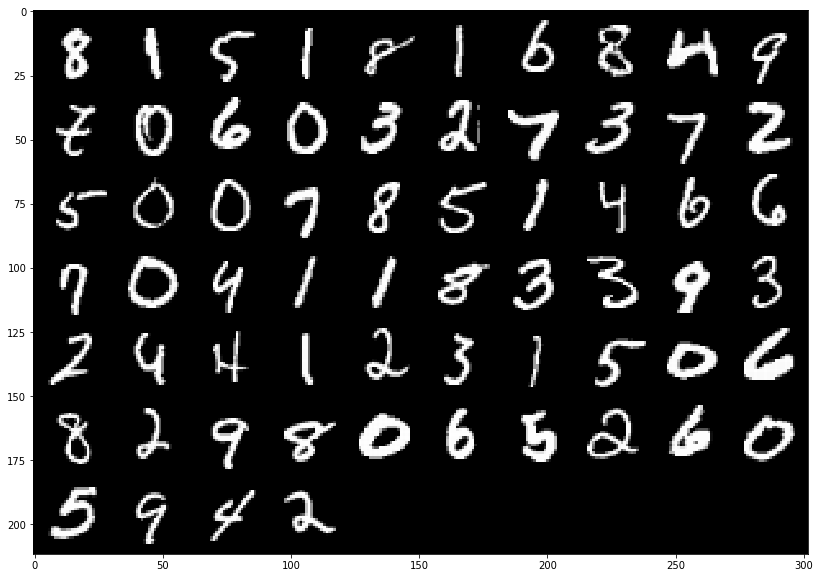

In [9]:
sample = next(iter(train_loader))
images, labels = sample # groups all the items in the batch into a set of seperate images and labels

grid = utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,10))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels:', labels)

# plots the first 10 images and their corresponding labels

# 5. Get familiar with Pytorch foundations, e.g. how to use tensors and how to build a deep neural network.

In [10]:
# various pieces of tensor code as from source [3]

t = torch.Tensor([[1,2,3], [4,5,6], [7,8,9]])

# Transpose the tensor by... (flip the axis 2x4 -> 4x2)
t.t()
t.permute(-1,0)

# Reshape a tensor with view(A,B) -> AxB tensor

t.view(1,9)

# Create a tensor with zeros

torch.zeros(4,4)

# Create a tensor with randoms from the normal distribution

torch.randn(3,3)

# Gets the last column of every row
t[:,-1]

# Gets the first 2 rows, all columns
t[:2, :]

# Gets the lower right most corner
t[-1:, -1:]

# Tensors share/copy data in different ways...

data = np.array([2,3,4])

t1 = torch.Tensor(data)
t2 = torch.tensor(data)
t3 = torch.as_tensor(data)
t4 = torch.from_numpy(data)

data[0] = 1
data[1] = 1
data[2] = 1

# the altering of the data items (as seen above) does not 
# affect the first two tensors (t1, t2). This is because 
# they are a copy of the the data array wherease the second
# two tensors (t3, t4) share the data array. This is more 
# efficient as there is no memory-copy

print(t1) #[2,3,4]
print(t2) #[2,3,4]
print(t3) #[1,1,1]
print(t4) #[1,1,1]

# an example tensor below...

t = torch.tensor([
    [3,3,3,3],
    [2,2,2,2],
    [1,1,1,1]
], dtype=torch.float32)

# ...with the following attributes
# shape - 3x4

t.size()
t.shape

# rank - 2

len(t.shape)

# no. of axis - 2; first of length 3 and second of length 4
# elements of first axis - arrays
# elements of first axis - numbers

# number of elements - 12

torch.tensor(t.shape).prod()
t.numel()

# the reshaping must have the same product as the original 
# shape e.g. 3x3 -> 9x1 (9 == 9 therefore satisfies)

# squeezing a tensor removes all of the axis with the length of 1

# unsqueezing adds an axis of length 1 to the tensor

### end of source [3]

# neural network code as from source [4]

from torch import autograd, nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
#       3 fully connected layers
        self.fc1 = nn.Linear(28*28, 200) # takes the 28*28 input pixels and connects to the first 200 node hidden layer
        self.fc2 = nn.Linear(200, 200) # 200 to 200 hidden layer
        self.fc3 = nn.Linear(200, 10) # last hidden layer to the output layer (10 nodes)

    def forward(self, x):
        x = F.relu(self.fc1(x)) # feed the data to the first fully connected layer (self.fc1(x)) and then apply ReLU activation
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x) # the last layer applys the log softmax activation

model = Model()
print(model)

### end of source [4]

tensor([2., 3., 4.])
tensor([2, 3, 4])
tensor([1, 1, 1])
tensor([1, 1, 1])
Model(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)


# 6. Install dependencies that are required as packages in the Anaconda environment.

In [11]:
print(torch.__version__)
print(np.__version__)
print(matplotlib.__version__)

1.0.1.post2
1.16.2
3.0.3


# 7. Get familiar with Jupyter Notebook that you will use to run your code.

In [12]:
# See this document

# 8. & 9.

In [13]:
import time

### Variable setup - defines the base learning rate and momentum

In [14]:
baseLearningRate = 0.01 # (0.000001 - 100)
baseMomentum = 0.5
baseEpochs = 10
baseCriterion = nn.CrossEntropyLoss()

### Define the training model

In [22]:
# training model code as from source [4]
from tensorboardX import SummaryWriter
import tensorflow as tf

writer = SummaryWriter(comment='mnist_embedding_training')

def train(chosenModel, chosenOptimizer, epochs, chosenCriterion, log_interval=200):
    
    # Set model to training mode
    chosenModel.train()
    # Loop over each batch from the training set
    for batch_idx, (data, target) in enumerate(train_loader):
        
        n_iter = (epochs * len(train_loader)) + batch_idx

        # Resets all the gradients in the model
        chosenOptimizer.zero_grad() 
            
        # Pass data through the model - calling its forward method
        output = chosenModel(data)

        # Calculate loss
        loss = chosenCriterion(output, target)

        # Backpropagate
        loss.backward()
        
        # Update weights
        chosenOptimizer.step()
    
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))
            
### end of source [4]

### Define the validation model

In [23]:
# validation model code as from source [4]

def validate(chosenModel, loss_vector, chosenCriterion, accuracy_vector):
    chosenModel.eval()
    val_loss, correct = 0, 0
    
    for data, target in validation_loader:
        output = chosenModel(data)
        val_loss += chosenCriterion(output, target).data.item()
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))

### end of source [4]

## In this section I will compare how a simple model with three fully connected layers reacts to dropout layers being applied to it and of different values

### Initialise the models

In [24]:
# Dropout model with low dropouts

class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 50)
        self.fc1_drop = nn.Dropout(0.1)  # dropout layer added
        
        self.fc2 = nn.Linear(50, 20)
        self.fc2_drop = nn.Dropout(0.1) # dropout layer added
        
        self.out = nn.Linear(20, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        
        x = self.fc1_drop(x)
        x = F.relu(self.fc2(x))
        
        x = self.fc2_drop(x)
        return F.log_softmax(self.out(x), dim=1)
    
# Dropout model with high dropouts

class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 50)
        self.fc1_drop = nn.Dropout(0.5)  # dropout layer added
        
        self.fc2 = nn.Linear(50, 20)
        self.fc2_drop = nn.Dropout(0.5) # dropout layer added
        
        self.out = nn.Linear(20, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        
        x = self.fc1_drop(x)
        x = F.relu(self.fc2(x))
        
        x = self.fc2_drop(x)
        return F.log_softmax(self.out(x), dim=1)
    

# Dropout model without dropouts

class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 50)
        
        self.fc2 = nn.Linear(50, 20)
        
        self.out = nn.Linear(20, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        
        x = F.relu(self.fc2(x))
        
        return F.log_softmax(self.out(x), dim=1)

### Define the models

In [25]:
model1 = Model1()
model2 = Model2()
model3 = Model3()

### Define the optimizers

In [26]:
optimizerModel1 = torch.optim.SGD(model1.parameters(), lr=baseLearningRate, momentum=baseMomentum)
optimizerModel2 = torch.optim.SGD(model2.parameters(), lr=baseLearningRate, momentum=baseMomentum)
optimizerModel3 = torch.optim.SGD(model3.parameters(), lr=baseLearningRate, momentum=baseMomentum)

### Define the arrays that will obtain the loss and accuracy data

In [27]:
lossModel1, accModel1 = [], []
lossModel2, accModel2 = [], []
lossModel3, accModel3 = [], []

### Run the training loops - note the loops have to be run seperatelty to obtain validation information from each epoch for graph plotting

In [28]:
t0 = time.time()

for epoch in range(1, baseEpochs + 1):
    train(model1, optimizerModel1, epoch, baseCriterion)
    validate(model1, lossModel1, baseCriterion, accModel1)
    
t1 = time.time()

timeModel1 = t1 - t0

# ------------------------------------------------------------

t0 = time.time()

for epoch in range(1, baseEpochs + 1):
    train(model2, optimizerModel2, epoch, baseCriterion)
    validate(model2, lossModel2, baseCriterion, accModel2)
    
t1 = time.time()
    
timeModel2 = t1 - t0

# ------------------------------------------------------------

t0 = time.time()

for epoch in range(1, baseEpochs + 1):
    train(model3, optimizerModel3, epoch, baseCriterion)
    validate(model3, lossModel3, baseCriterion, accModel3)
    
t1 = time.time()
    
timeModel3 = t1 - t0


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.277956
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.067287
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.568875
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.750441
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.161691

Validation set: Average loss: 0.5960, Accuracy: 8322/10000 (83.22%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.921330
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.742945
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.648378
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.661732
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.430634

Validation set: Average loss: 0.3904, Accuracy: 8909/10000 (89.09%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.462678
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.620893
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.400108
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.812956
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.314767

Validation set: Average loss: 0.3178, Accuracy: 9071/10000 (90.71%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.282170
Train Epoc

Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.232856
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.169623
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.099760
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.175732

Validation set: Average loss: 0.1921, Accuracy: 9428/10000 (94.28%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.098190
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.134031
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.186099
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.123414
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.098837

Validation set: Average loss: 0.1792, Accuracy: 9467/10000 (94.67%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.208555
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.131102
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.092823
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.145898
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.280155

Validation set: Average loss: 0.1722, Accuracy: 9494/10000 (94.94%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.279177
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.259730
Tra

### Plot the results

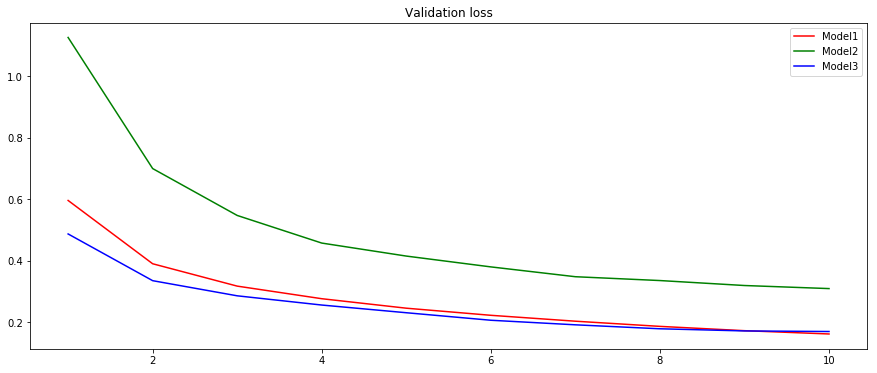

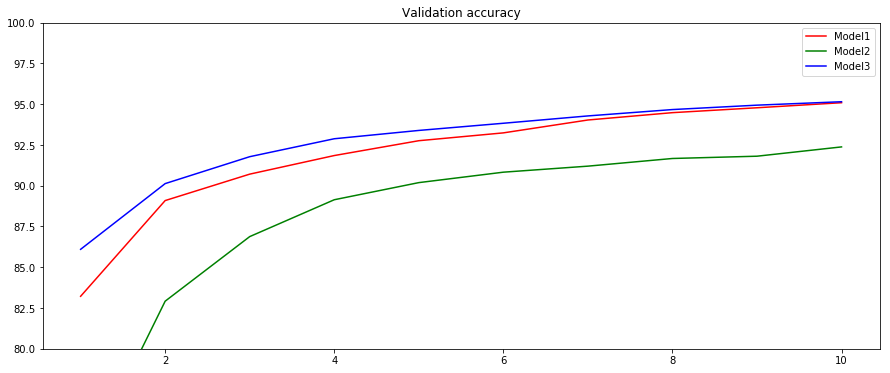

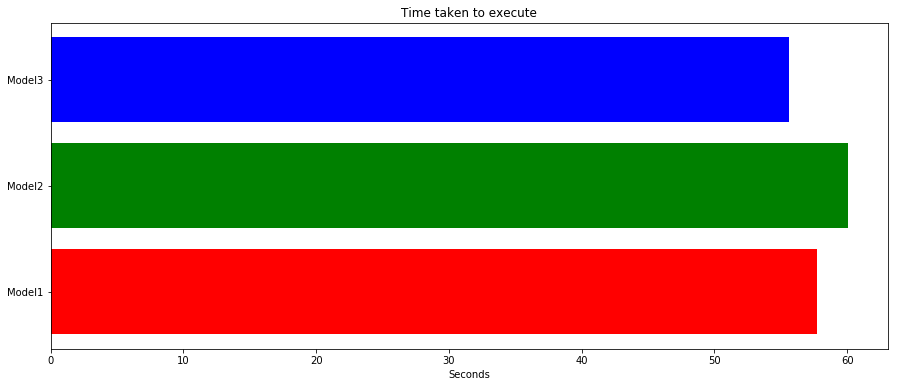

In [29]:

plt.figure(figsize=(15,6))
plt.plot(np.arange(1,baseEpochs+1), lossModel1, color='red', label='Model1')
plt.plot(np.arange(1,baseEpochs+1), lossModel2, color='green', label='Model2')
plt.plot(np.arange(1,baseEpochs+1), lossModel3, color='blue', label='Model3')
plt.title('Validation loss')

leg = plt.legend();

# axes1 = plt.gca()
# axes1.set_ylim([1,0])

plt.figure(figsize=(15,6))
plt.plot(np.arange(1,baseEpochs+1), accModel1, color='red', label='Model1')
plt.plot(np.arange(1,baseEpochs+1), accModel2, color='green', label='Model2')
plt.plot(np.arange(1,baseEpochs+1), accModel3, color='blue', label='Model3')
plt.title('Validation accuracy');

axes = plt.gca()

leg = plt.legend();

axes.set_ylim([80,100])


objects = ('Model1', 'Model2', 'Model3')
performance = [timeModel1,timeModel2,timeModel3]
y_pos = np.arange(len(performance))

plt.figure(figsize=(15,6))
plt.barh(y_pos, performance, align='center', color=['red', 'green', 'blue'])
plt.yticks(y_pos, objects)
plt.xlabel('Seconds')
plt.title('Time taken to execute')
 
plt.show()

### Recap:

Model 1 - Low dropout count  
Model 2 - High dropout count  
Model 3 - No dropouts

### Discussion

From the results models 1 and 3 perform the best, and are almost identical with their validation loss, accuracy and time taken. This shows that, for this dataset and up to 10 epochs, there is minimal benefit from including dropout features with a low dropout rate (0.1) as opposed to any at all. In comparison, the addition of dropout features of a high rate (0.5) produces less accurate results, suggesting overfitting is not an issue with the MNIST dataset.

## In this section I will compare the affects of changing the parameters of various models

### Initialise the models

In [30]:
# Model comprised of 2 fully connected layers with relatively low input/output mapping

class Model4(nn.Module):
    def __init__(self):
        super(Model4, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 50)
        self.fc1_drop = nn.Dropout(0.2)
        
        self.fc2 = nn.Linear(50, 20)
        self.fc2_drop = nn.Dropout(0.2)
        
        self.out = nn.Linear(20, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        
        x = self.fc1_drop(x)
        x = F.relu(self.fc2(x))
        
        x = self.fc2_drop(x)
        return F.log_softmax(self.out(x), dim=1)
    

# Model comprised of 2 fully connected layers with relatively high input/output mapping

class Model5(nn.Module):
    def __init__(self):
        super(Model5, self).__init__()
        self.fc1 = nn.Linear(28*28, 1000)
        self.fc1_drop = nn.Dropout(0.2)
        
        self.fc2 = nn.Linear(1000, 500)
        self.fc2_drop = nn.Dropout(0.2)
        
        self.out = nn.Linear(500, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        
        x = self.fc1_drop(x)
        x = F.relu(self.fc2(x))
        
        x = self.fc2_drop(x)
        return F.log_softmax(self.out(x), dim=1)
    
    
# Model comprised of 4 fully connected layers with relatively low input/output mapping

class Model6(nn.Module):
    def __init__(self):
        super(Model6, self).__init__()
        self.fc1 = nn.Linear(28*28, 100) 
        self.fc1_drop = nn.Dropout(0.2)
        
        self.fc2 = nn.Linear(100, 50)
        self.fc2_drop = nn.Dropout(0.2)
        
        self.fc3 = nn.Linear(50, 35)
        self.fc3_drop = nn.Dropout(0.2)
        
        self.fc4 = nn.Linear(35, 20)
        self.fc4_drop = nn.Dropout(0.2)
        
        self.out = nn.Linear(20, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        
        x = F.relu(self.fc2(x))
        x = self.fc2_drop(x)
        
        x = F.relu(self.fc3(x))
        x = self.fc3_drop(x)
        
        x = F.relu(self.fc4(x))
        x = self.fc4_drop(x)
        
        return F.log_softmax(self.out(x), dim=1)
    
# Model comprised of 4 fully connected layers with relatively high input/output mapping

class Model7(nn.Module):
    def __init__(self):
        super(Model7, self).__init__()
        self.fc1 = nn.Linear(28*28, 1000)
        self.fc1_drop = nn.Dropout(0.2)
        
        self.fc2 = nn.Linear(1000, 500)
        self.fc2_drop = nn.Dropout(0.2)
        
        self.fc3 = nn.Linear(500, 200)
        self.fc3_drop = nn.Dropout(0.2)
        
        self.fc4 = nn.Linear(200, 100)
        self.fc4_drop = nn.Dropout(0.2)
        
        self.out = nn.Linear(100, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        
        x = F.relu(self.fc2(x))
        x = self.fc2_drop(x)
        
        x = F.relu(self.fc3(x))
        x = self.fc3_drop(x)
        
        x = F.relu(self.fc4(x))
        x = self.fc4_drop(x)
        return F.log_softmax(self.out(x), dim=1)    
    

### Define the models

In [31]:
model4 = Model4()
model5 = Model5()
model6 = Model6()
model7 = Model7()

### Define the optimisers

In [32]:
optimizerModel4 = torch.optim.SGD(model4.parameters(), lr=baseLearningRate, momentum=baseMomentum)
optimizerModel5 = torch.optim.SGD(model5.parameters(), lr=baseLearningRate, momentum=baseMomentum)
optimizerModel6 = torch.optim.SGD(model6.parameters(), lr=baseLearningRate, momentum=baseMomentum)
optimizerModel7 = torch.optim.SGD(model7.parameters(), lr=baseLearningRate, momentum=baseMomentum)

### Define the arrays that will obtain the loss and accuracy data

In [33]:
lossModel4, accModel4 = [], []
lossModel5, accModel5 = [], []
lossModel6, accModel6 = [], []
lossModel7, accModel7 = [], []

### Run the training loops

In [34]:
t0 = time.time()

for epoch in range(1, baseEpochs + 1):
    train(model4, optimizerModel4, baseEpochs, baseCriterion)
    validate(model4, lossModel4, baseCriterion, accModel4)
    
t1 = time.time()

timeModel4 = t1 - t0

# ------------------------------------------------------------

t0 = time.time()

for epoch in range(1, baseEpochs + 1):
    train(model5, optimizerModel5, baseEpochs, baseCriterion)
    validate(model5, lossModel5, baseCriterion, accModel5)
    
t1 = time.time()
    
timeModel5 = t1 - t0

# ------------------------------------------------------------

t0 = time.time()

for epoch in range(1, baseEpochs + 1):
    train(model6, optimizerModel6, baseEpochs, baseCriterion)
    validate(model6, lossModel6, baseCriterion, accModel6)
    
t1 = time.time()
    
timeModel6 = t1 - t0

# ------------------------------------------------------------

t0 = time.time()

for epoch in range(1, baseEpochs + 1):
    train(model7, optimizerModel7, baseEpochs, baseCriterion)
    validate(model7, lossModel7, baseCriterion, accModel7)
    
t1 = time.time()
    
timeModel7 = t1 - t0

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.341110
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.114075
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.606493
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.983901
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.062085

Validation set: Average loss: 0.6170, Accuracy: 8451/10000 (84.51%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.932333
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.955893
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.596447
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.886623
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.771379

Validation set: Average loss: 0.4021, Accuracy: 8913/10000 (89.13%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.622382
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.886401
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.652149
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.617477
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.385767

Validation set: Average loss: 0.3272, Accuracy: 9086/10000 (90.86%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.391906
Train Epoc

Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.482751
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.370327
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.525856
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.387729

Validation set: Average loss: 0.2756, Accuracy: 9383/10000 (93.83%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.460729
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.634348
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.381660
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.541127
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.321560

Validation set: Average loss: 0.2648, Accuracy: 9385/10000 (93.85%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.443762
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.230874
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.308632
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.393404
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.328049

Validation set: Average loss: 0.2255, Accuracy: 9463/10000 (94.63%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.246559
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.187161
Tra

### Plot the results

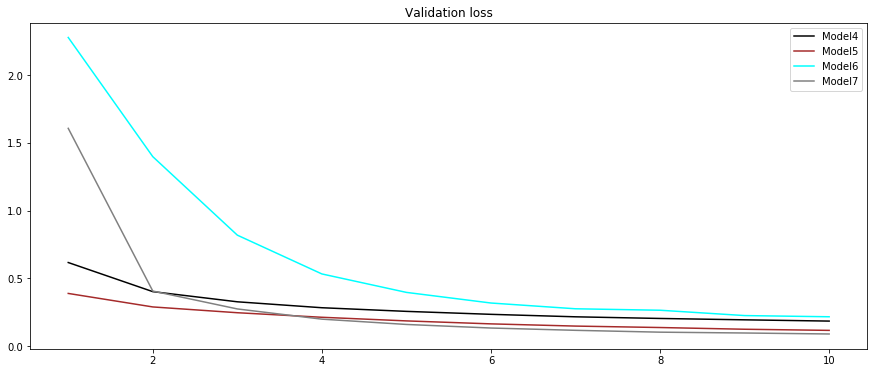

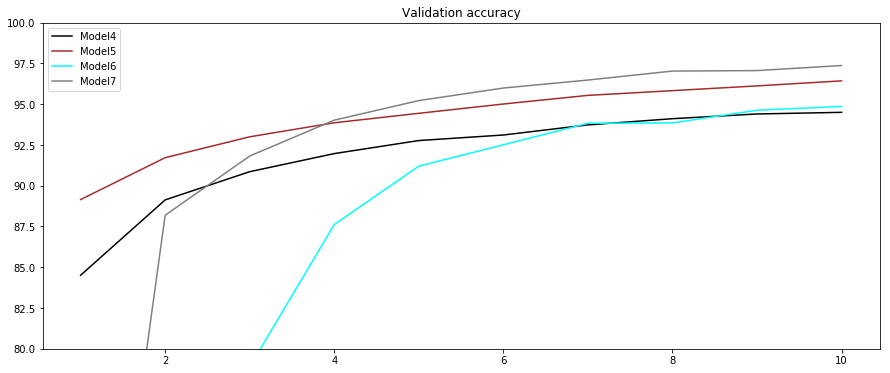

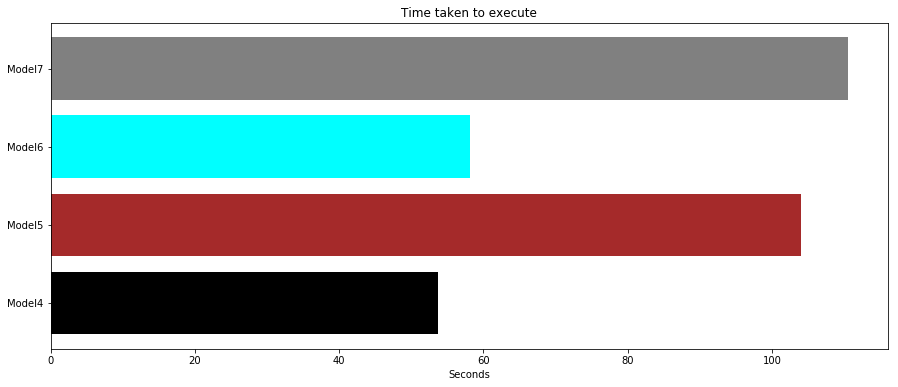

In [35]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(1,baseEpochs+1), lossModel4, color='black', label='Model4')
plt.plot(np.arange(1,baseEpochs+1), lossModel5, color='brown', label='Model5')
plt.plot(np.arange(1,baseEpochs+1), lossModel6, color='cyan', label='Model6')
plt.plot(np.arange(1,baseEpochs+1), lossModel7, color='grey', label='Model7')
plt.title('Validation loss')

leg = plt.legend();

# axes1 = plt.gca()
# axes1.set_ylim([1,0])

plt.figure(figsize=(15,6))
plt.plot(np.arange(1,baseEpochs+1), accModel4, color='black', label='Model4')
plt.plot(np.arange(1,baseEpochs+1), accModel5, color='brown', label='Model5')
plt.plot(np.arange(1,baseEpochs+1), accModel6, color='cyan', label='Model6')
plt.plot(np.arange(1,baseEpochs+1), accModel7, color='grey', label='Model7')
plt.title('Validation accuracy');

axes = plt.gca()

leg = plt.legend();

axes.set_ylim([80,100])


objects = ('Model4', 'Model5', 'Model6', 'Model7')
performance = [timeModel4,timeModel5,timeModel6,timeModel7]
y_pos = np.arange(len(performance))

plt.figure(figsize=(15,6))
plt.barh(y_pos, performance, align='center', color=['black', 'brown', 'cyan', 'grey'])
plt.yticks(y_pos, objects)
plt.xlabel('Seconds')
plt.title('Time taken to execute')
 
plt.show()

### Recap:

Model 4 - 2 fully connected layers with low input/output parameters  
Model 5 - 2 fully connected layers with high input/output parameters  
Model 6 - 4 fully connected layers with low input/output parameters  
Model 7 - 4 fully connected layers with high input/output parameters  

### Discussion

From the results a clear correlation can be identified in terms of time to train and the size of the input/output parameters. The higher the parameters the longer it takes for the training to execute. In terms of results the models with the higher parameters seem to perform better, however considerations should be made to determine whether the extra time needed for the model to train is worth the minimal gain in accuracy, especially when an increased number of fully connected layers are implemented (model 6 is close to model 5's results, yet model 6 takes around half the time to train.

## In this section I will compare the affects of changing the number of layers of various models

### Discussion

Using the data from above there doesn't seem to be enough time difference between layer sizes to warrant concern. However, the accuracy and loss of the validation data does suggest that when a very low number of epochs is used the results are lower than than the models with less layers. As more epochs are then used to train the modles the results surpass that of their corresponding counterpart models with a lower number of layers.

## In this section I will compare the affects of changing the parameters of two convolutional network

### Initialise the models

In [36]:
class Model8(nn.Module):
    def __init__(self):
        super(Model8, self).__init__()
        
        self.layer1 = nn.Sequential( 
            nn.Conv2d(1, 15, kernel_size=(5,5), stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2))

        self.layer2 = nn.Sequential(
            nn.Conv2d(15, 30, kernel_size=(5,5), stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2))

        self.drop_out = nn.Dropout()
        
        self.fc1 = nn.Linear(7 * 7 * 30, 20)
        self.fc2 = nn.Linear(20, 15)
        self.out = nn.Linear(15, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)

        out = out.reshape(out.size(0), -1)
        
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return F.log_softmax(self.out(out), dim=1)
    
class Model9(nn.Module):
    def __init__(self):
        super(Model9, self).__init__()
        
        self.layer1 = nn.Sequential( 
            nn.Conv2d(1, 50, kernel_size=(5,5), stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2))

        self.layer2 = nn.Sequential(
            nn.Conv2d(50, 150, kernel_size=(5,5), stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2))

        self.drop_out = nn.Dropout()
        
        self.fc1 = nn.Linear(7 * 7 * 150, 100)
        self.fc2 = nn.Linear(100, 50)
        self.out = nn.Linear(50, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)

        out = out.reshape(out.size(0), -1)
        
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return F.log_softmax(self.out(out), dim=1)

### Define the models

In [37]:
model8 = Model8()
model9 = Model9()

### Define the optimisers

In [38]:
optimizerModel8 = torch.optim.SGD(model8.parameters(), lr=baseLearningRate, momentum=baseMomentum)
optimizerModel9 = torch.optim.SGD(model9.parameters(), lr=baseLearningRate, momentum=baseMomentum)

### Define the arrays that will obtain the loss and accuracy data

In [39]:
lossModel8, accModel8 = [], []
lossModel9, accModel9 = [], []

### Run the training loops

In [40]:
t0 = time.time()

for epoch in range(1, baseEpochs + 1):
    train(model8, optimizerModel8, baseEpochs, baseCriterion)
    validate(model8, lossModel8, baseCriterion, accModel8)
    
t1 = time.time()

timeModel8 = t1 - t0

# ------------------------------------------------------------

t0 = time.time()

for epoch in range(1, baseEpochs + 1):
    train(model9, optimizerModel9, baseEpochs, baseCriterion)
    validate(model9, lossModel9, baseCriterion, accModel9)
    
t1 = time.time()
    
timeModel9 = t1 - t0

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303692
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.212349
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.664668
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.326172
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.478586

Validation set: Average loss: 0.2070, Accuracy: 9404/10000 (94.04%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.398685
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.202695
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.167089
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.197023
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.225573

Validation set: Average loss: 0.1103, Accuracy: 9658/10000 (96.58%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.111006
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.158698
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.096051
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.172049
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.117068

Validation set: Average loss: 0.0850, Accuracy: 9724/10000 (97.24%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.221821
Train Epoc

### Plot the results

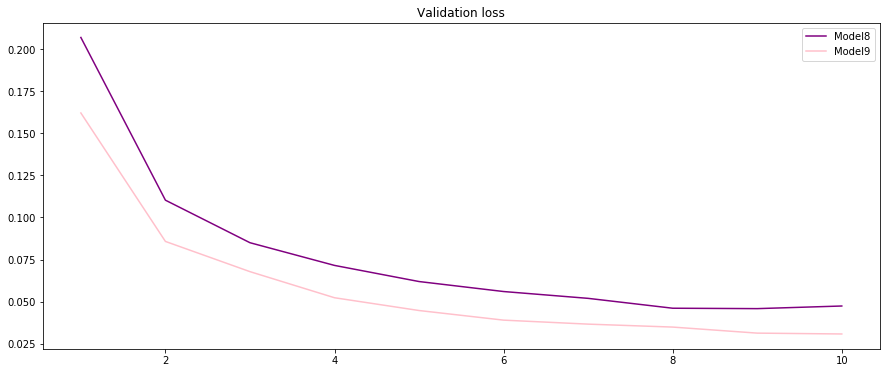

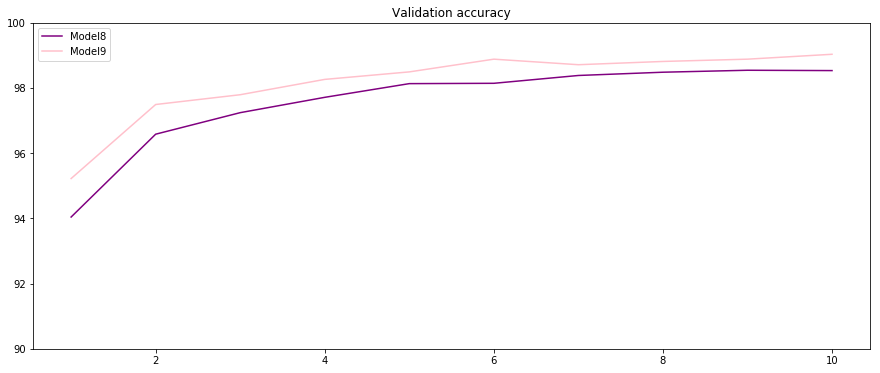

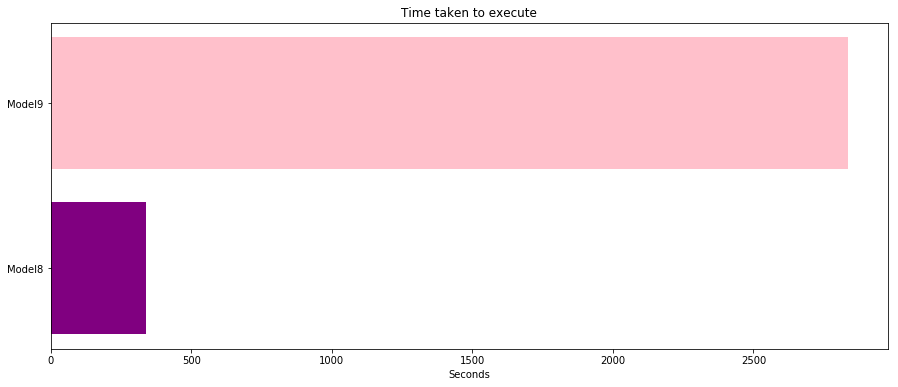

In [41]:

plt.figure(figsize=(15,6))
plt.plot(np.arange(1,baseEpochs+1), lossModel8, color='purple', label='Model8')
plt.plot(np.arange(1,baseEpochs+1), lossModel9, color='pink', label='Model9')
plt.title('Validation loss')

leg = plt.legend();

# axes1 = plt.gca()
# axes1.set_ylim([1,0])

plt.figure(figsize=(15,6))
plt.plot(np.arange(1,baseEpochs+1), accModel8, color='purple', label='Model8')
plt.plot(np.arange(1,baseEpochs+1), accModel9, color='pink', label='Model9')
plt.title('Validation accuracy');

axes = plt.gca()

leg = plt.legend();

axes.set_ylim([90,100])


objects = ('Model8', 'Model9')
performance = [timeModel8,timeModel9]
y_pos = np.arange(len(performance))

plt.figure(figsize=(15,6))
plt.barh(y_pos, performance, align='center', color=['purple', 'pink'])
plt.yticks(y_pos, objects)
plt.xlabel('Seconds')
plt.title('Time taken to execute')
 
plt.show()

### Recap:

Model 8 - 2 convolutional and 2 fully connected layers with low input/output parameters  
Model 9 - 2 convolutional and 2 fully connected layers with high input/output parameters  

### Discussion

From the results you can see the higher the parameters of input/output of the convolutional and fully connected layers the more accurate the results, although, this accuracy is of minimal amount. In addition, the time takes to complete training takes a considerate amount of time longer (around 8 times) when higher parameters are used.

## In this section I will compare the all of the models trained above in a more overall comparison

### Plot the results

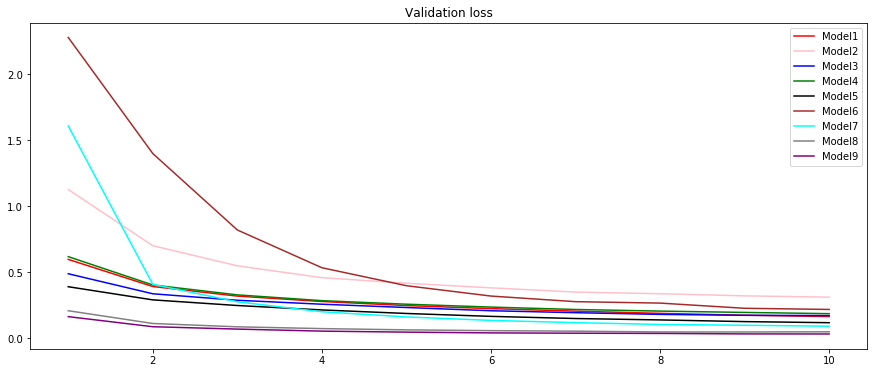

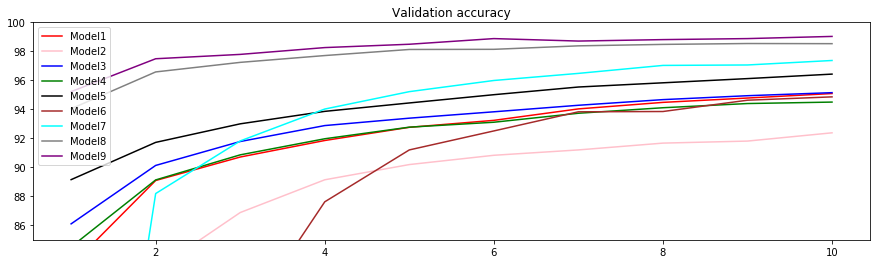

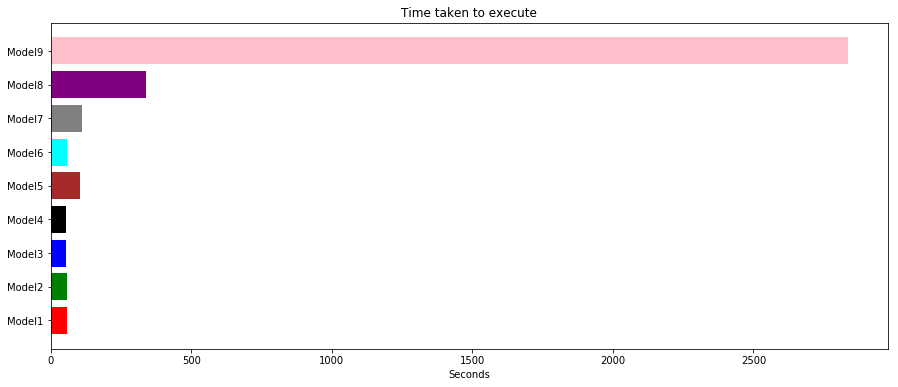

In [61]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(1,baseEpochs+1), lossModel1, color='red', label='Model1')
plt.plot(np.arange(1,baseEpochs+1), lossModel2, color='pink', label='Model2')
plt.plot(np.arange(1,baseEpochs+1), lossModel3, color='blue', label='Model3')
plt.plot(np.arange(1,baseEpochs+1), lossModel4, color='green', label='Model4')
plt.plot(np.arange(1,baseEpochs+1), lossModel5, color='black', label='Model5')
plt.plot(np.arange(1,baseEpochs+1), lossModel6, color='brown', label='Model6')
plt.plot(np.arange(1,baseEpochs+1), lossModel7, color='cyan', label='Model7')
plt.plot(np.arange(1,baseEpochs+1), lossModel8, color='grey', label='Model8')
plt.plot(np.arange(1,baseEpochs+1), lossModel9, color='purple', label='Model9')
plt.title('Validation loss')

leg = plt.legend();

# axes1 = plt.gca()
# axes1.set_ylim([1,0])

plt.figure(figsize=(15,4))
plt.plot(np.arange(1,baseEpochs+1), accModel1, color='red', label='Model1')
plt.plot(np.arange(1,baseEpochs+1), accModel2, color='pink', label='Model2')
plt.plot(np.arange(1,baseEpochs+1), accModel3, color='blue', label='Model3')
plt.plot(np.arange(1,baseEpochs+1), accModel4, color='green', label='Model4')
plt.plot(np.arange(1,baseEpochs+1), accModel5, color='black', label='Model5')
plt.plot(np.arange(1,baseEpochs+1), accModel6, color='brown', label='Model6')
plt.plot(np.arange(1,baseEpochs+1), accModel7, color='cyan', label='Model7')
plt.plot(np.arange(1,baseEpochs+1), accModel8, color='grey', label='Model8')
plt.plot(np.arange(1,baseEpochs+1), accModel9, color='purple', label='Model9')
plt.title('Validation accuracy');

axes = plt.gca()

leg = plt.legend();

axes.set_ylim([85,100])

objects = ('Model1','Model2','Model3','Model4','Model5','Model6','Model7','Model8','Model9')
performance = [timeModel1,timeModel2,timeModel3,timeModel4,timeModel5,timeModel6,timeModel7,timeModel8,timeModel9]
y_pos = np.arange(len(performance))

plt.figure(figsize=(15,6))
plt.barh(y_pos, performance, align='center', color=['red', 'green', 'blue', 'black', 'brown', 'cyan', 'grey', 'purple', 'pink'])
plt.yticks(y_pos, objects)
plt.xlabel('Seconds')
plt.title('Time taken to execute')
 
plt.show()

From these results we can gather that the number of linear layers does not drastically affect the execution time, in comparison to the addition of convolutional layers in models 5 and 6. However, due to the fact these models acquire high levels of accuracy within the test data in less epoch time it might be more beneficial to run them on less epochs and therefore possibly achieving better results in the same time (e.g. model 5 reduced to 4 epoch and receives an accuracy of ~97.5% in similar time to other models that achieve lower.) 

## In this section I will compare different optimizers and there learning rate value to see how they respond

### Initialise the optimisers

In [43]:
learningOriginal = 0.01
learningHigher = 1
learningHighest = 100


optimizerRMSOriginal = torch.optim.RMSprop(model1.parameters(), lr=learningOriginal)
optimizerRMSHigher = torch.optim.RMSprop(model1.parameters(), lr=learningHigher)
optimizerRMSHighest = torch.optim.RMSprop(model1.parameters(), lr=learningHighest)

optimizerSGDOriginal = torch.optim.SGD(model1.parameters(), lr=learningOriginal, momentum=0.5)
optimizerSGDHigher = torch.optim.SGD(model1.parameters(), lr=learningHigher, momentum=0.5)
optimizerSGDHighest = torch.optim.SGD(model1.parameters(), lr=learningHighest, momentum=0.5)

optimizerAdadeltaOriginal = torch.optim.Adadelta(model1.parameters(), lr=learningOriginal)
optimizerAdadeltaHigher = torch.optim.Adadelta(model1.parameters(), lr=learningHigher)
optimizerAdadeltaHighest = torch.optim.Adadelta(model1.parameters(), lr=learningHighest)


optimizers = [optimizerRMSOriginal, optimizerRMSHigher, optimizerRMSHighest,
             optimizerSGDOriginal, optimizerSGDHigher, optimizerSGDHighest,
             optimizerAdadeltaOriginal, optimizerAdadeltaHigher, optimizerAdadeltaHighest]

### Run the training loops

In [44]:
times = []

for optim in optimizers:
    
    t0 = time.time()

    train(model1, optim, 1, baseCriterion)
    validate(model1, [], baseCriterion, [])
    
    t1 = time.time()
    
    print(t1-t0)
    
    times.append(t1-t0)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.276129
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.276986
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.322079
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.210394
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.402125

Validation set: Average loss: 0.2451, Accuracy: 9201/10000 (92.01%)

5.530642986297607
Train Epoch: 10 [0/60000 (0%)]	Loss: 0.349934
Train Epoch: 10 [12800/60000 (21%)]	Loss: 2.717199
Train Epoch: 10 [25600/60000 (43%)]	Loss: 2.415054
Train Epoch: 10 [38400/60000 (64%)]	Loss: 2.584360
Train Epoch: 10 [51200/60000 (85%)]	Loss: 2.507123

Validation set: Average loss: 3.0714, Accuracy: 893/10000 (8.93%)

5.516960144042969
Train Epoch: 10 [0/60000 (0%)]	Loss: 2.716205
Train Epoch: 10 [12800/60000 (21%)]	Loss: 149.426697
Train Epoch: 10 [25600/60000 (43%)]	Loss: 129.389297
Train Epoch: 10 [38400/60000 (64%)]	Loss: 167.051086
Train Epoch: 10 [51200/60000 (85%)]	Loss: 154.631897

Validation set: Average loss: 145.3028, Accuracy: 982/10000 (9.82%)

### Plot the results

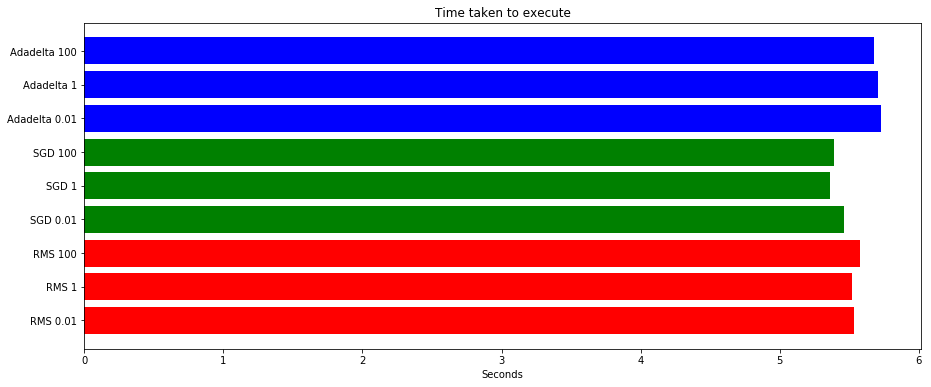

The highest time taken to complete one epoch was 5.73 seconds achieved by Adadelta 0.01 Learning Rate
The lowest time taken to complete one epoch was 5.36 seconds achieved by SGD 1 Learning Rate
This is a possible reduction of 6.50%


In [58]:
names = ('RMS 0.01', 'RMS 1', 'RMS 100','SGD 0.01', 'SGD 1', 'SGD 100','Adadelta 0.01', 'Adadelta 1', 'Adadelta 100')
y_pos = np.arange(len(times))

plt.figure(figsize=(15,6))
plt.barh(y_pos, times, align='center', color=['red', 'red', 'red', 'green', 'green', 'green', 'blue', 'blue', 'blue'])
plt.yticks(y_pos, names)
plt.xlabel('Seconds')
plt.title('Time taken to execute')

axes = plt.gca()
 
plt.show()

def getLowest(times: list):
    lowest = times[0]
    for item in times:
        if(item < lowest):
            lowest = item
    return lowest

def getHighest(times: list):
    highest = times[0]
    for item in times:
        if(item > highest):
            highest = item
    return highest

def getLowestName(times: list, names: list):
    lowest = times[0]
    lowestName = names[0]
    
    for x in range(len(times)):
      if(times[x] < lowest):
        lowest = times[x]
        lowestName = names[x]
        
    return lowestName

def getHighestName(times: list, names: list):
    highest = times[0]
    highestName = names[0]
    
    for x in range(len(times)):
      if(times[x] > highest):
        highest = times[x]
        highestName = names[x]
        
    return highestName


lowestTime = getLowest(times)
lowestNameName = getLowestName(times, names)

highestTime = getHighest(times)
highestTimeName = getHighestName(times, names)

differencePercentage = (((highestTime - lowestTime)/highestTime)*100)

print('The highest time taken to complete one epoch was {:.2f} seconds achieved by {} Learning Rate\nThe lowest time taken to complete one epoch was {:.2f} seconds achieved by {} Learning Rate\nThis is a possible reduction of {:.2f}%'
    .format(
        highestTime, highestTimeName, lowestTime, lowestNameName, differencePercentage))
    

In [46]:
def getLowest(times: list):
    lowest = times[0]
    for item in times:
        if(item < lowest):
            lowest = item
    return lowest

def getHighest(times: list):
    highest = times[0]
    for item in times:
        if(item > highest):
            highest = item
    return highest

def getLowestName(times: list, names: list):
    lowest = times[0]
    lowestName = names[0]
    
    for x in range(len(times)):
      if(times[x] < lowest):
        lowest = times[x]
        lowestName = names[x]
        
    return lowestName

def getHighestName(times: list, names: list):
    highest = times[0]
    highestName = names[0]
    
    for x in range(len(times)):
      if(times[x] > highest):
        highest = times[x]
        highestName = names[x]
        
    return highestName


lowestTime = getLowest(times)
lowestNameName = getLowestName(times, names)

highestTime = getHighest(times)
highestTimeName = getHighestName(times, names)

differencePercentage = (((highestTime - lowestTime)/highestTime)*100)

print('The highest time taken to complete one epoch was {:.2f} seconds achieved by {} Learning Rate\nThe lowest time taken to complete one epoch was {:.2f} seconds achieved by {} Learning Rate\nThis is a possible reduction of {:.2f}%'
    .format(
        highestTime, highestTimeName, lowestTime, lowestNameName, differencePercentage))
    
# print("The lowest time taken to complete one epoch was ", lowestTime, )
# print(lowestNameName)
# print(highestTime)
# print(highestTimeName)
# print(differencePercentage)

The highest time taken to complete one epoch was 5.73 seconds achieved by Adadelta 0.01 Learning Rate
The lowest time taken to complete one epoch was 5.36 seconds achieved by SGD 1 Learning Rate
This is a possible reduction of 6.50%


# 10.

In [52]:
# tensorflow code as from source [6]
import tensorflow as tf
import numpy as np
import scipy.misc 
try:
    from StringIO import StringIO  # Python 2.7
except ImportError:
    from io import BytesIO         # Python 3.x


class Logger(object):
    
    def __init__(self, log_dir):
        """Create a summary writer logging to log_dir."""
        self.writer = tf.summary.FileWriter(log_dir)

    def scalar_summary(self, tag, value, step):
        """Log a scalar variable."""
        summary = tf.Summary(value=[tf.Summary.Value(tag=tag, simple_value=value)])
        self.writer.add_summary(summary, step)

    def image_summary(self, tag, images, step):
        """Log a list of images."""

        img_summaries = []
        for i, img in enumerate(images):
            # Write the image to a string
            try:
                s = StringIO()
            except:
                s = BytesIO()
            scipy.misc.toimage(img).save(s, format="png")

            # Create an Image object
            img_sum = tf.Summary.Image(encoded_image_string=s.getvalue(),
                                       height=img.shape[0],
                                       width=img.shape[1])
            # Create a Summary value
            img_summaries.append(tf.Summary.Value(tag='%s/%d' % (tag, i), image=img_sum))

        # Create and write Summary
        summary = tf.Summary(value=img_summaries)
        self.writer.add_summary(summary, step)
        
    def histo_summary(self, tag, values, step, bins=1000):
        """Log a histogram of the tensor of values."""

        # Create a histogram using numpy
        counts, bin_edges = np.histogram(values, bins=bins)

        # Fill the fields of the histogram proto
        hist = tf.HistogramProto()
        hist.min = float(np.min(values))
        hist.max = float(np.max(values))
        hist.num = int(np.prod(values.shape))
        hist.sum = float(np.sum(values))
        hist.sum_squares = float(np.sum(values**2))

        # Drop the start of the first bin
        bin_edges = bin_edges[1:]

        # Add bin edges and counts
        for edge in bin_edges:
            hist.bucket_limit.append(edge)
        for c in counts:
            hist.bucket.append(c)

        # Create and write Summary
        summary = tf.Summary(value=[tf.Summary.Value(tag=tag, histo=hist)])
        self.writer.add_summary(summary, step)
        self.writer.flush()
### end of source [6] 

In [53]:
# dummy_input = ((torch.zeros(1, 3)))

import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from tensorboardX import SummaryWriter
import tensorflow as tf

logger = Logger('./loggerr')


In [54]:
# tensorboard code as from source [5]

writer = SummaryWriter(comment='mnist_embedding_training')

total_step = 60000
data_iter = iter(train_loader)
iter_per_epoch = len(train_loader)

for step in range(total_step):
    
    # Reset the data_iter
    if (step+1) % iter_per_epoch == 0:
        data_iter = iter(train_loader)

    # Fetch images and labels
    images, labels = next(data_iter)
    images, labels = images.view(images.size(0), -1), labels
    
    # Forward pass
    outputs = model1(images)
    loss = baseCriterion(outputs, labels)
    
    # Backward and optimize
    optimizerModel1.zero_grad()
    loss.backward()
    optimizerModel1.step()

    # Compute accuracy
    _, argmax = torch.max(outputs, 1)
    accuracy = (labels == argmax.squeeze()).float().mean()

    if (step+1) % 100 == 0:
        print ('Step [{}/{}], Loss: {:.4f}, Acc: {:.2f}' 
               .format(step+1, total_step, loss.item(), accuracy.item()))

        # ================================================================== #
        #                        Tensorboard Logging                         #
        # ================================================================== #

        # 1. Log scalar values (scalar summary)
        info = { 'loss': loss.item(), 'accuracy': accuracy.item() }

        for tag, value in info.items():
            logger.scalar_summary(tag, value, step+1)

        # 2. Log values and gradients of the parameters (histogram summary)
        for tag, value in model1.named_parameters():
            tag = tag.replace('.', '/')
            logger.histo_summary(tag, value.data.cpu().numpy(), step+1)
            logger.histo_summary(tag+'/grad', value.grad.data.cpu().numpy(), step+1)

        # 3. Log training images (image summary)
        info = { 'images': images.view(-1, 28, 28)[:10].cpu().numpy() }

        for tag, images in info.items():
            logger.image_summary(tag, images, step+1)
                
### end of source [5]

Step [100/60000], Loss: 2.2800, Acc: 0.20


/anaconda3/envs/Env36/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


Step [200/60000], Loss: 2.3082, Acc: 0.14
Step [300/60000], Loss: 2.3066, Acc: 0.11
Step [400/60000], Loss: 2.2813, Acc: 0.12
Step [500/60000], Loss: 2.3208, Acc: 0.03
Step [600/60000], Loss: 2.3158, Acc: 0.09
Step [700/60000], Loss: 2.3105, Acc: 0.06
Step [800/60000], Loss: 2.2921, Acc: 0.14
Step [900/60000], Loss: 2.3027, Acc: 0.14
Step [1000/60000], Loss: 2.3098, Acc: 0.08
Step [1100/60000], Loss: 2.2916, Acc: 0.20
Step [1200/60000], Loss: 2.3108, Acc: 0.09
Step [1300/60000], Loss: 2.3023, Acc: 0.09
Step [1400/60000], Loss: 2.3045, Acc: 0.11
Step [1500/60000], Loss: 2.3043, Acc: 0.08
Step [1600/60000], Loss: 2.3070, Acc: 0.09
Step [1700/60000], Loss: 2.2899, Acc: 0.16
Step [1800/60000], Loss: 2.2927, Acc: 0.19
Step [1900/60000], Loss: 2.3053, Acc: 0.03
Step [2000/60000], Loss: 2.3083, Acc: 0.09
Step [2100/60000], Loss: 2.2961, Acc: 0.09
Step [2200/60000], Loss: 2.2995, Acc: 0.11
Step [2300/60000], Loss: 2.3008, Acc: 0.11
Step [2400/60000], Loss: 2.3133, Acc: 0.08
Step [2500/60000], 

Step [19100/60000], Loss: 2.2977, Acc: 0.11
Step [19200/60000], Loss: 2.3036, Acc: 0.12
Step [19300/60000], Loss: 2.2966, Acc: 0.11
Step [19400/60000], Loss: 2.3085, Acc: 0.06
Step [19500/60000], Loss: 2.3046, Acc: 0.12
Step [19600/60000], Loss: 2.3015, Acc: 0.11
Step [19700/60000], Loss: 2.2959, Acc: 0.16
Step [19800/60000], Loss: 2.3115, Acc: 0.08
Step [19900/60000], Loss: 2.2918, Acc: 0.17
Step [20000/60000], Loss: 2.3018, Acc: 0.11
Step [20100/60000], Loss: 2.3050, Acc: 0.08
Step [20200/60000], Loss: 2.3050, Acc: 0.08
Step [20300/60000], Loss: 2.2948, Acc: 0.11
Step [20400/60000], Loss: 2.3039, Acc: 0.09
Step [20500/60000], Loss: 2.2877, Acc: 0.19
Step [20600/60000], Loss: 2.2821, Acc: 0.19
Step [20700/60000], Loss: 2.3117, Acc: 0.08
Step [20800/60000], Loss: 2.3032, Acc: 0.11
Step [20900/60000], Loss: 2.3054, Acc: 0.09
Step [21000/60000], Loss: 2.2907, Acc: 0.12
Step [21100/60000], Loss: 2.2976, Acc: 0.12
Step [21200/60000], Loss: 2.3011, Acc: 0.12
Step [21300/60000], Loss: 2.3088

Step [37800/60000], Loss: 2.3064, Acc: 0.12
Step [37900/60000], Loss: 2.2980, Acc: 0.11
Step [38000/60000], Loss: 2.2915, Acc: 0.12
Step [38100/60000], Loss: 2.2979, Acc: 0.09
Step [38200/60000], Loss: 2.3075, Acc: 0.06
Step [38300/60000], Loss: 2.2951, Acc: 0.14
Step [38400/60000], Loss: 2.3079, Acc: 0.06
Step [38500/60000], Loss: 2.3033, Acc: 0.12
Step [38600/60000], Loss: 2.2974, Acc: 0.17
Step [38700/60000], Loss: 2.3063, Acc: 0.09
Step [38800/60000], Loss: 2.2928, Acc: 0.11
Step [38900/60000], Loss: 2.2930, Acc: 0.19
Step [39000/60000], Loss: 2.3004, Acc: 0.11
Step [39100/60000], Loss: 2.2973, Acc: 0.16
Step [39200/60000], Loss: 2.3093, Acc: 0.03
Step [39300/60000], Loss: 2.3061, Acc: 0.09
Step [39400/60000], Loss: 2.3027, Acc: 0.09
Step [39500/60000], Loss: 2.2934, Acc: 0.14
Step [39600/60000], Loss: 2.2990, Acc: 0.11
Step [39700/60000], Loss: 2.3033, Acc: 0.19
Step [39800/60000], Loss: 2.3032, Acc: 0.08
Step [39900/60000], Loss: 2.2854, Acc: 0.17
Step [40000/60000], Loss: 2.3052

Step [56500/60000], Loss: 2.3126, Acc: 0.08
Step [56600/60000], Loss: 2.2912, Acc: 0.16
Step [56700/60000], Loss: 2.3073, Acc: 0.08
Step [56800/60000], Loss: 2.2920, Acc: 0.17
Step [56900/60000], Loss: 2.2955, Acc: 0.22
Step [57000/60000], Loss: 2.3095, Acc: 0.06
Step [57100/60000], Loss: 2.3092, Acc: 0.05
Step [57200/60000], Loss: 2.3179, Acc: 0.05
Step [57300/60000], Loss: 2.2951, Acc: 0.14
Step [57400/60000], Loss: 2.3035, Acc: 0.09
Step [57500/60000], Loss: 2.3032, Acc: 0.14
Step [57600/60000], Loss: 2.2940, Acc: 0.14
Step [57700/60000], Loss: 2.2923, Acc: 0.19
Step [57800/60000], Loss: 2.2936, Acc: 0.09
Step [57900/60000], Loss: 2.3053, Acc: 0.08
Step [58000/60000], Loss: 2.3053, Acc: 0.09
Step [58100/60000], Loss: 2.2993, Acc: 0.11
Step [58200/60000], Loss: 2.3006, Acc: 0.17
Step [58300/60000], Loss: 2.2954, Acc: 0.16
Step [58400/60000], Loss: 2.3000, Acc: 0.06
Step [58500/60000], Loss: 2.2973, Acc: 0.12
Step [58600/60000], Loss: 2.2998, Acc: 0.12
Step [58700/60000], Loss: 2.3004

In [1]:
# source [1] https://code.visualstudio.com/docs/python/python-tutorial
# source [2] https://pytorch.org/docs/stable/torchvision/datasets.html
# source [3] https://www.kdnuggets.com/2018/05/pytorch-tensor-basics.html
# source [4] https://adventuresinmachinelearning.com/pytorch-tutorial-deep-learning/
# source [5] https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/04-utils/tensorboard/main.py
# source [6] https://gist.github.com/gyglim/1f8dfb1b5c82627ae3efcfbbadb9f514